In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import inv_boxcox

In [2]:
import pandas_datareader as pdr
from datetime import datetime

In [3]:
import yfinance as yf

In [5]:
start = datetime(2023,8,1)
end = datetime.now()
start,end

(datetime.datetime(2023, 8, 1, 0, 0),
 datetime.datetime(2024, 8, 29, 21, 13, 20, 273949))

In [11]:
tick = 'AMIORG.NS'
df = yf.download(tick, start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:
tick = '^NSEI'
df1 = yf.download(tick, start, end)
df1.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,19784.000000,19795.599609,19704.599609,19733.550781,19733.550781,298000
2023-08-02,19655.400391,19678.250000,19423.550781,19526.550781,19526.550781,290700
2023-08-03,19463.750000,19537.650391,19296.449219,19381.650391,19381.650391,315700
2023-08-04,19462.800781,19538.849609,19436.449219,19517.000000,19517.000000,280800
2023-08-07,19576.849609,19620.449219,19524.800781,19597.300781,19597.300781,216600
2023-08-08,19627.199219,19634.400391,19533.099609,19570.849609,19570.849609,260300
2023-08-09,19578.800781,19645.500000,19467.500000,19632.550781,19632.550781,266500
2023-08-10,19605.550781,19623.599609,19495.400391,19543.099609,19543.099609,312200
2023-08-11,19554.250000,19557.750000,19412.750000,19428.300781,19428.300781,235500


In [27]:
df_return = round(np.log(df['Close']).diff()*100,2)
df1_return = round(np.log(df1['Close']).diff()*100,2)

In [25]:
df_return = pd.DataFrame(df_return).dropna(inplace = True)
df1_return = pd.DataFrame(df1_return).dropna(inplace = True)

In [47]:
x = pd.DataFrame(df_return).dropna()
y = pd.DataFrame(df1_return).dropna()

In [48]:
x.rename(columns = {"Close":"AMIORG"}, inplace = True)
y.rename(columns = {"Close":"NIFTY50"}, inplace = True)

In [49]:
z = pd.concat([y,x], axis = 1)
z.head()

,NIFTY50,AMIORG
Date,,
2023-08-02,-1.05,0.58
2023-08-03,-0.74,2.90
2023-08-04,0.70,2.86
2023-08-07,0.41,0.37
2023-08-08,-0.14,-0.92


In [52]:
sigma_market = z["NIFTY50"].std()
sigma_i = z["AMIORG"].std()

In [57]:
covariance = z["NIFTY50"].cov(z['AMIORG'])

In [58]:
beta = covariance/sigma_market/sigma_market
beta

1.0156333809139377

In [59]:
z["NIFTY50"].corr(z['AMIORG'])

0.36812228142791226

In [138]:
df_return.dropna(inplace = True)
df_return.index[-60]

Timestamp('2023-01-30 00:00:00')

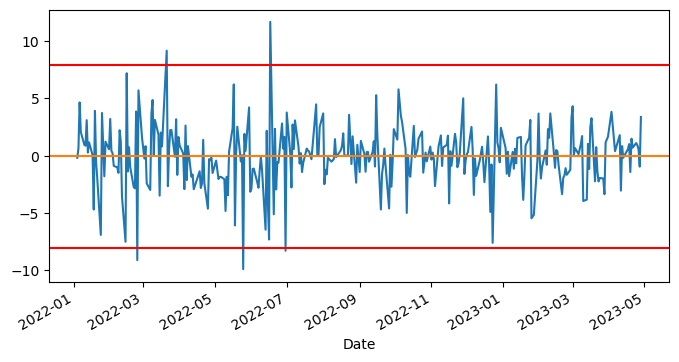

In [139]:
nobs, minmax, mu, var, skew, kurtosis = stats.describe(df_return)
fig, ax = plt.subplots(figsize=(8,4))
lcl = mu - 3*np.sqrt(var)
ucl = mu + 3*np.sqrt(var)
df_return.plot(ax = ax)
ax.axhline(mu, color = 'C1')
ax.axhline(lcl, color = 'r')
ax.axhline(ucl, color = 'r')

In [60]:
!pip install yfinance